In [303]:
from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import more_itertools as mit

Upload `seqs.fna` which contains a multiple alignment of about 200,000 16S rRNA gene sequences. Calculate variability (average identity, or fraction of most common base) at each position in the alignment. Degeneracies and gaps are treated as non-conserved.

**I only seem to get 5,088 sequences?**

In [59]:
alignment = []
identifiers = []

fna_obj = list(SeqIO.parse('seqs.fna', 'fasta'))
for i, seq in enumerate(fna_obj):
    alignment.append(seq.seq)
    identifiers.append(seq.id)
    
print('Alignment contains ' + str(len(alignment)) + ' sequences.')

Alignment contains 5088 sequences.


In [63]:
alignment

[Seq('------TGATCCCGCCGGAGGCT-ATTGCTATTGGGGTCGCTAAGCCATGCGAG...---', SingleLetterAlphabet()),
 Seq('---------------------CG-ACTGCTATCGGATGGGCTAAGCCATGCGAG...---', SingleLetterAlphabet()),
 Seq('-CCGGTTGATCCTGCCGGCGGTC-ACTGCTATCGAGTTCGCTAAGCCATGCGAG...---', SingleLetterAlphabet()),
 Seq('TCCGGTTGATCCCGCCGGAGGTC-ACTGCTATCCGAACCGCTAAGCCATGCAAG...---', SingleLetterAlphabet()),
 Seq('-CTGGTTGATCCTGCCGGACCTG-ACTGCTATCGGGAGAGCTAAGCCATGGAAG...---', SingleLetterAlphabet()),
 Seq('TCCGGTTGATCCCGCCGGACCAG-ACGGCTATTGGAGTCGTTAAGCCATGCGAG...---', SingleLetterAlphabet()),
 Seq('-CCGGTTGATCCTGCCAGAGGCC-ACTGCTATCGGGGCCGCTAAGCCATGCGAG...---', SingleLetterAlphabet()),
 Seq('------------------AGGTC-ACCGCTATTGGAAACGTTAAGGCATGCGAG...---', SingleLetterAlphabet()),
 Seq('TCCGGTTGATCCTGCCAGATGCA-TCTTATATCCGA-GGCCTTAGGTATGCAAG...---', SingleLetterAlphabet()),
 Seq('------------------------------------------------------...---', SingleLetterAlphabet()),
 Seq('------------------AGGCC-ACTGCTATTGGAAGCGCTAAGCCATGCGAG

In [44]:
# Initialize position count tracker 
counts = {}
for i in range(0, len(alignment[0])):
    counts[i] = {'A': 0, 'C': 0, 'T': 0, 'G': 0}
    
# For each position in each sequence, track only if ACTG
for seq in alignment:
    for i, pos in enumerate(seq):
        if pos not in counts[i]:
            pass
        else:
            counts[i][pos] += 1
            
# Calculate and write identity values to text file, one per line
total_pos = len(alignment)
with open('identity.txt', 'w') as outfile:
    for i in counts:
        most_common_base = max(counts[i], key=counts[i].get)
        outfile.write(str((counts[i][most_common_base]/total_pos) * 100) + '\n')

In [64]:
counts

{0: {'A': 47, 'C': 5, 'T': 215, 'G': 51},
 1: {'A': 4, 'C': 101, 'T': 5, 'G': 2061},
 2: {'A': 2101, 'C': 83, 'T': 22, 'G': 35},
 3: {'A': 4, 'C': 8, 'T': 0, 'G': 2276},
 4: {'A': 1, 'C': 1, 'T': 2195, 'G': 113},
 5: {'A': 2, 'C': 2, 'T': 2368, 'G': 3},
 6: {'A': 2, 'C': 9, 'T': 2365, 'G': 5},
 7: {'A': 0, 'C': 2, 'T': 4, 'G': 2403},
 8: {'A': 2402, 'C': 3, 'T': 12, 'G': 3},
 9: {'A': 4, 'C': 6, 'T': 2429, 'G': 0},
 10: {'A': 3, 'C': 2384, 'T': 74, 'G': 8},
 11: {'A': 366, 'C': 2084, 'T': 29, 'G': 9},
 12: {'A': 3, 'C': 16, 'T': 2496, 'G': 4},
 13: {'A': 3, 'C': 1, 'T': 12, 'G': 2518},
 14: {'A': 7, 'C': 127, 'T': 1, 'G': 2418},
 15: {'A': 10, 'C': 2527, 'T': 17, 'G': 22},
 16: {'A': 22, 'C': 1, 'T': 2466, 'G': 129},
 17: {'A': 8, 'C': 2475, 'T': 10, 'G': 148},
 18: {'A': 2650, 'C': 18, 'T': 6, 'G': 8},
 19: {'A': 47, 'C': 71, 'T': 13, 'G': 2671},
 20: {'A': 1254, 'C': 55, 'T': 5, 'G': 2048},
 21: {'A': 2748, 'C': 93, 'T': 324, 'G': 295},
 22: {'A': 13, 'C': 1516, 'T': 1947, 'G': 50},


Plot the variability against the position in the gapped alignment.

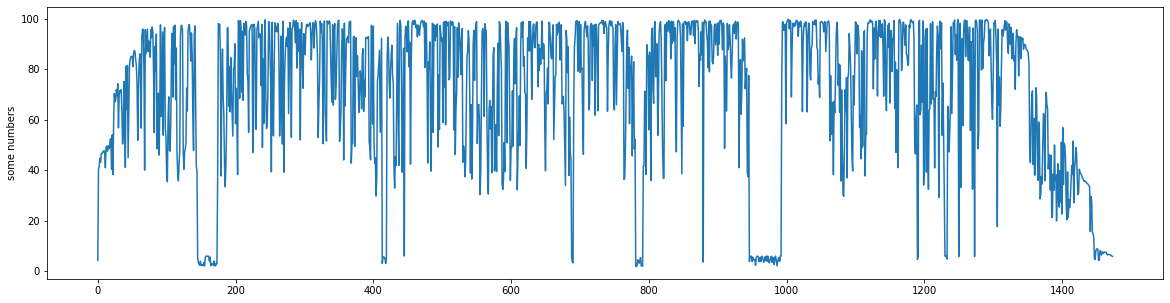

In [86]:
variability = []

with open('identity.txt', 'r') as infile:
    for line in infile:
        variability.append(float(line))
        
plt.figure(figsize=(20,5))
plt.plot(variability)
plt.ylabel('some numbers')
plt.show()

Need to ensure I have right lengths of arrays here.

Smooth the plot.

The resulting frequency distribution was then smoothed by taking the mean frequency within a 50-base sliding window, moving 1 base position at a time along the alignment https://www.researchgate.net/figure/Hypervariable-regions-within-the-16S-rRNA-gene-in-Pseudomonas-The-plotted-line-reflects_fig2_224832532

In [257]:
minima

array([ 171,  418,  555,  690,  781,  986, 1083, 1190, 1454])

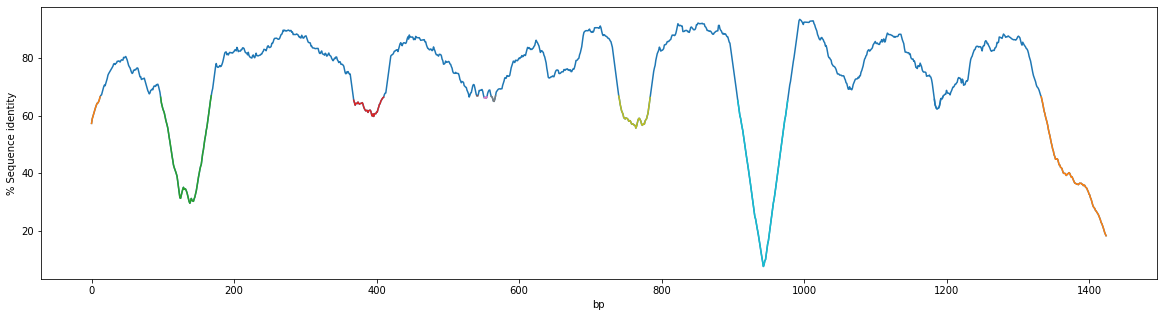

In [260]:
rolling_mean = pd.Series(variability).rolling(window=50).mean().iloc[50-1:].values
plt.figure(figsize=(20,5))
plt.plot(rolling_mean)
for i, _ in enumerate(ranges): 
    plt.plot(ranges[i], [rolling_mean[j] for j in ranges[i]])
plt.ylabel('% Sequence identity')
plt.xlabel('bp')
plt.show()

https://stackoverflow.com/questions/47484899/moving-average-produces-array-of-different-length

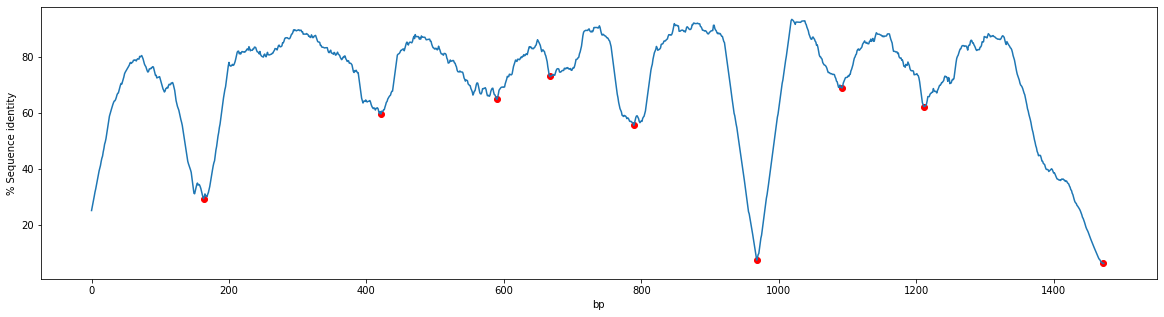

In [328]:
# More accurate
n = 50
padded_variability = np.pad(variability, (n//2, n-1-n//2), mode='edge')
smoothed = np.convolve(padded_variability, np.ones((n,))/n, mode='valid')
minima = argrelextrema(np.array(smoothed), np.less, order=50)[0]
plt.figure(figsize=(20,5))
plt.plot(smoothed)
plt.scatter(minima, [smoothed[i] for i in minima], color='red')
plt.ylabel('% Sequence identity')
plt.xlabel('bp')
plt.show()

In [334]:
ranges = []

for i, x in enumerate(smoothed):
    if x < 67:
        ranges.append(i)
        
ranges = [list(group) for group in mit.consecutive_groups(ranges)]

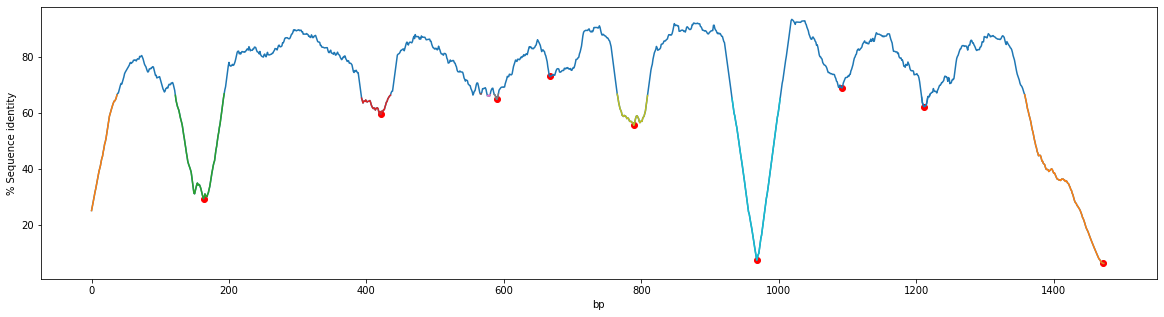

In [335]:
# More accurate
n = 50
padded_variability = np.pad(variability, (n//2, n-1-n//2), mode='edge')
smoothed = np.convolve(padded_variability, np.ones((n,))/n, mode='valid')
minima = argrelextrema(np.array(smoothed), np.less, order=50)[0]
plt.figure(figsize=(20,5))
plt.plot(smoothed)
plt.scatter(minima, [smoothed[i] for i in minima], color='red')
for i, _ in enumerate(ranges): 
    plt.plot(ranges[i], [smoothed[j] for j in ranges[i]])
plt.ylabel('% Sequence identity')
plt.xlabel('bp')
plt.show()

In [337]:
len(ranges)

11

In [338]:
ranges

[[0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 [122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  158,
  159,
  160,
  161,
  162,
  163,
  164,
  165,
  166,
  167,
  168,
  169,
  170,
  171,
  172,
  173,
  174,
  175,
  176,
  177,
  178,
  179,
  180,
  181,
  182,
  183,
  184,
  185,
  186,
  187,
  188,
  189,
  190,
  191,
  192,
  193],
 [393,
  394,
  395,
  396,
  397,
  398,
  399,
  400,
  401,
  402,
  403,
  404,
  405,
  406,
  407,
  408,
  409,
  410,
  411,
  412,
  413,
  414,
  415,
  416,
  417,
  418,
  419,
  420,
  421,
  422,
  423,
  424,
  425,
  426,
  427,
  428,
  429,
  430,
  431,
  4